<a href="https://colab.research.google.com/github/Gaurav2912/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1q12QkUJV93coNY1p2iQV15UHxfkH4na0" align="left" hspace="25px" vspace="20px" width="40" height="50" ></p>


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


![](https://miro.medium.com/max/828/0*bepdYypteRGfqJYP.jpg)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1pNPWpgMSrFyFEo7TLhqOZXnSTicDLHLe" align="left" hspace="10px" vspace="10px" width="55" height="65" ></p>



## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Roadmap**

![](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/bike_sharing_34496d0e96.png)

In [ ]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries

import numpy as np
from numpy import math
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
# pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# For displaying ploty plot in colab nootbook
import plotly.io as pio
pio.renderers.default = "colab"

In [50]:
# Read the csv file
path = "/content/drive/MyDrive/Colab Notebooks/capstone project/Bike Sharing Demand Prediction/"
df = pd.read_csv(path + "SeoulBikeData.csv",encoding= 'unicode_escape')

In [51]:
# Head of the data frame
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [52]:
# tail of the data frame
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [53]:
# Check the dimension of data drame
df.shape

(8760, 14)

This dataset contains 8760 rows and 14 columns.

----
**Confirm quickly with .info() methods the datatypes and null values in our dataframe.**


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

 "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data.


In [55]:
# conferming null values with diffretnt method 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

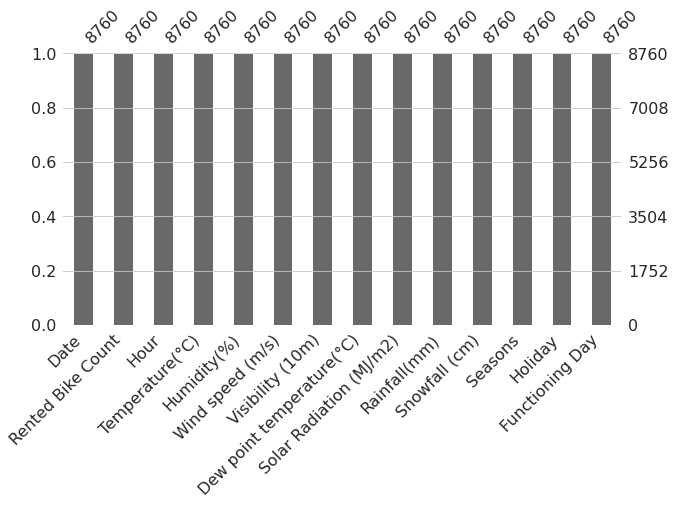

In [56]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df, figsize= (10,5));

In [57]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


* From above we can see that, there is not a single missing value anywhere in Data Frame.
* Not a single duplicate entry in data frame.
<br/>

# Feature Engineering

Extract part of date

* Year
* Month
* Day
* Weekday


In [98]:
Convert it to datetime object
df['Date'] =  pd.to_datetime(df['Date'])

def add_weekend(day):
  """
  return True for weekend, for saturday and sunday.
  """
  return True if day in [5,6] else False


def add_dateparts(df, col):
  """
  Extract and create year, month, Day, Weekday and Hour
  """

  df['Year'] = df[col].dt.year
  df['Month'] = df[col].dt.month
  df['Day'] = df[col].dt.day
  df['Weekday'] = df[col].dt.weekday

# creating datepart
add_dateparts(df, 'Date')

# create new column for weekend
df['Weekend'] = df['Weekday'].apply(add_weekend)

# Now it is time to drop the feature
df.drop("Date",axis= 1, inplace=True)

# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

In [99]:
# Checking for unique values 
df.nunique().sort_values()

Weekend                         2
Year                            2
Functioning Day                 2
Holiday                         2
Seasons                         4
Weekday                         7
Month                          12
Hour                           24
Day                            31
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

# Exploratory Data Analysis

---
Now I will divide this into two parts, once for the count plot and the other for the histogram.

The count plot will have those features which have less than 32 unique values.

In [100]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17'])
plt.rcParams['font.size'] = 14

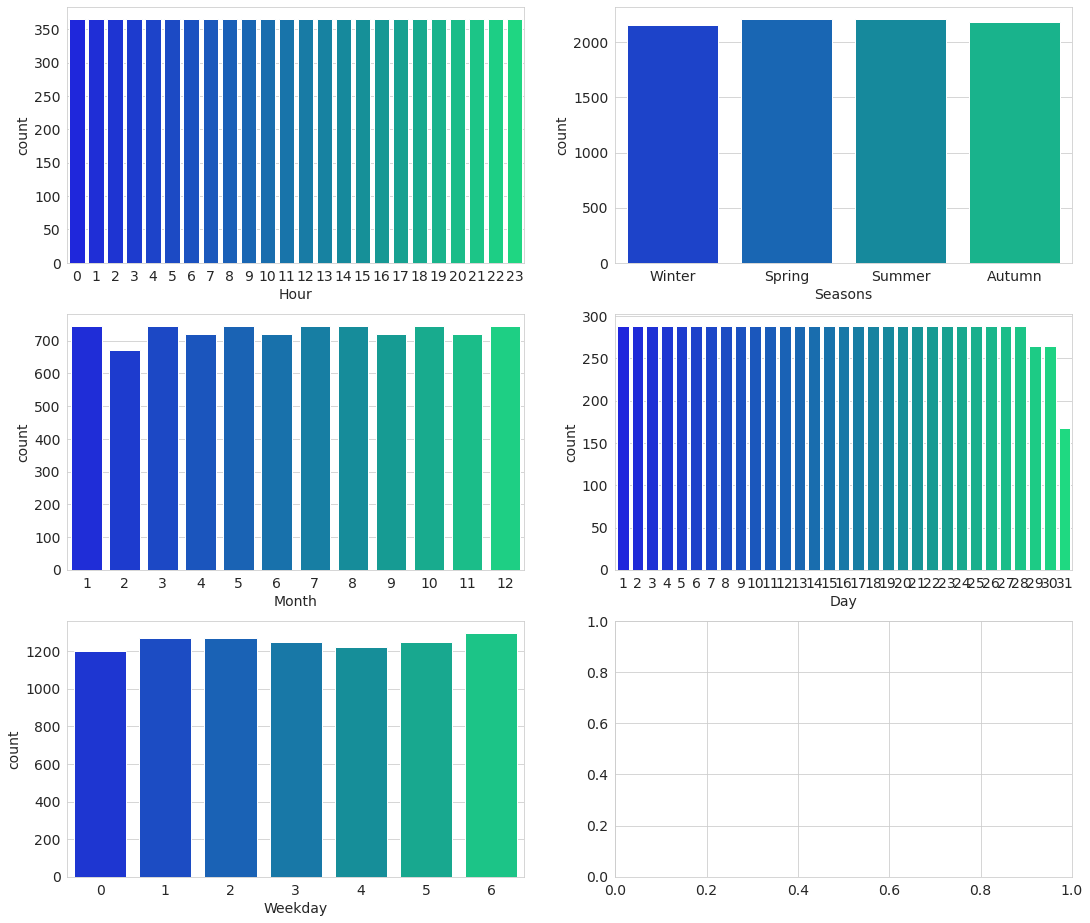

In [101]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(18, 16), nrows= 3, ncols= 2)

# non binary feature that have less than 32 unique values
features_cplot = [col for col in df.columns if  2 < len(df[col].unique()) < 32]

for i, feature in enumerate(features_cplot):
  ax = axes[i//2, i % 2]
  sns.countplot(data= df, x= feature, ax= ax, palette= 'winter')

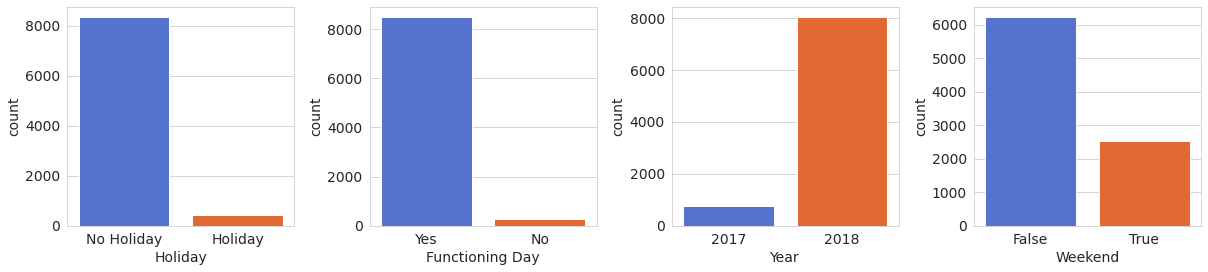

In [103]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(17,4), nrows= 1, ncols= 4)

# binary feature 
features_cplot_bin = [col for col in df.columns  if len(df[col].unique()) < 3]

for i, feature in enumerate(features_cplot_bin):
  sns.countplot(data= df, x = feature, ax = axes[i])

plt.tight_layout();

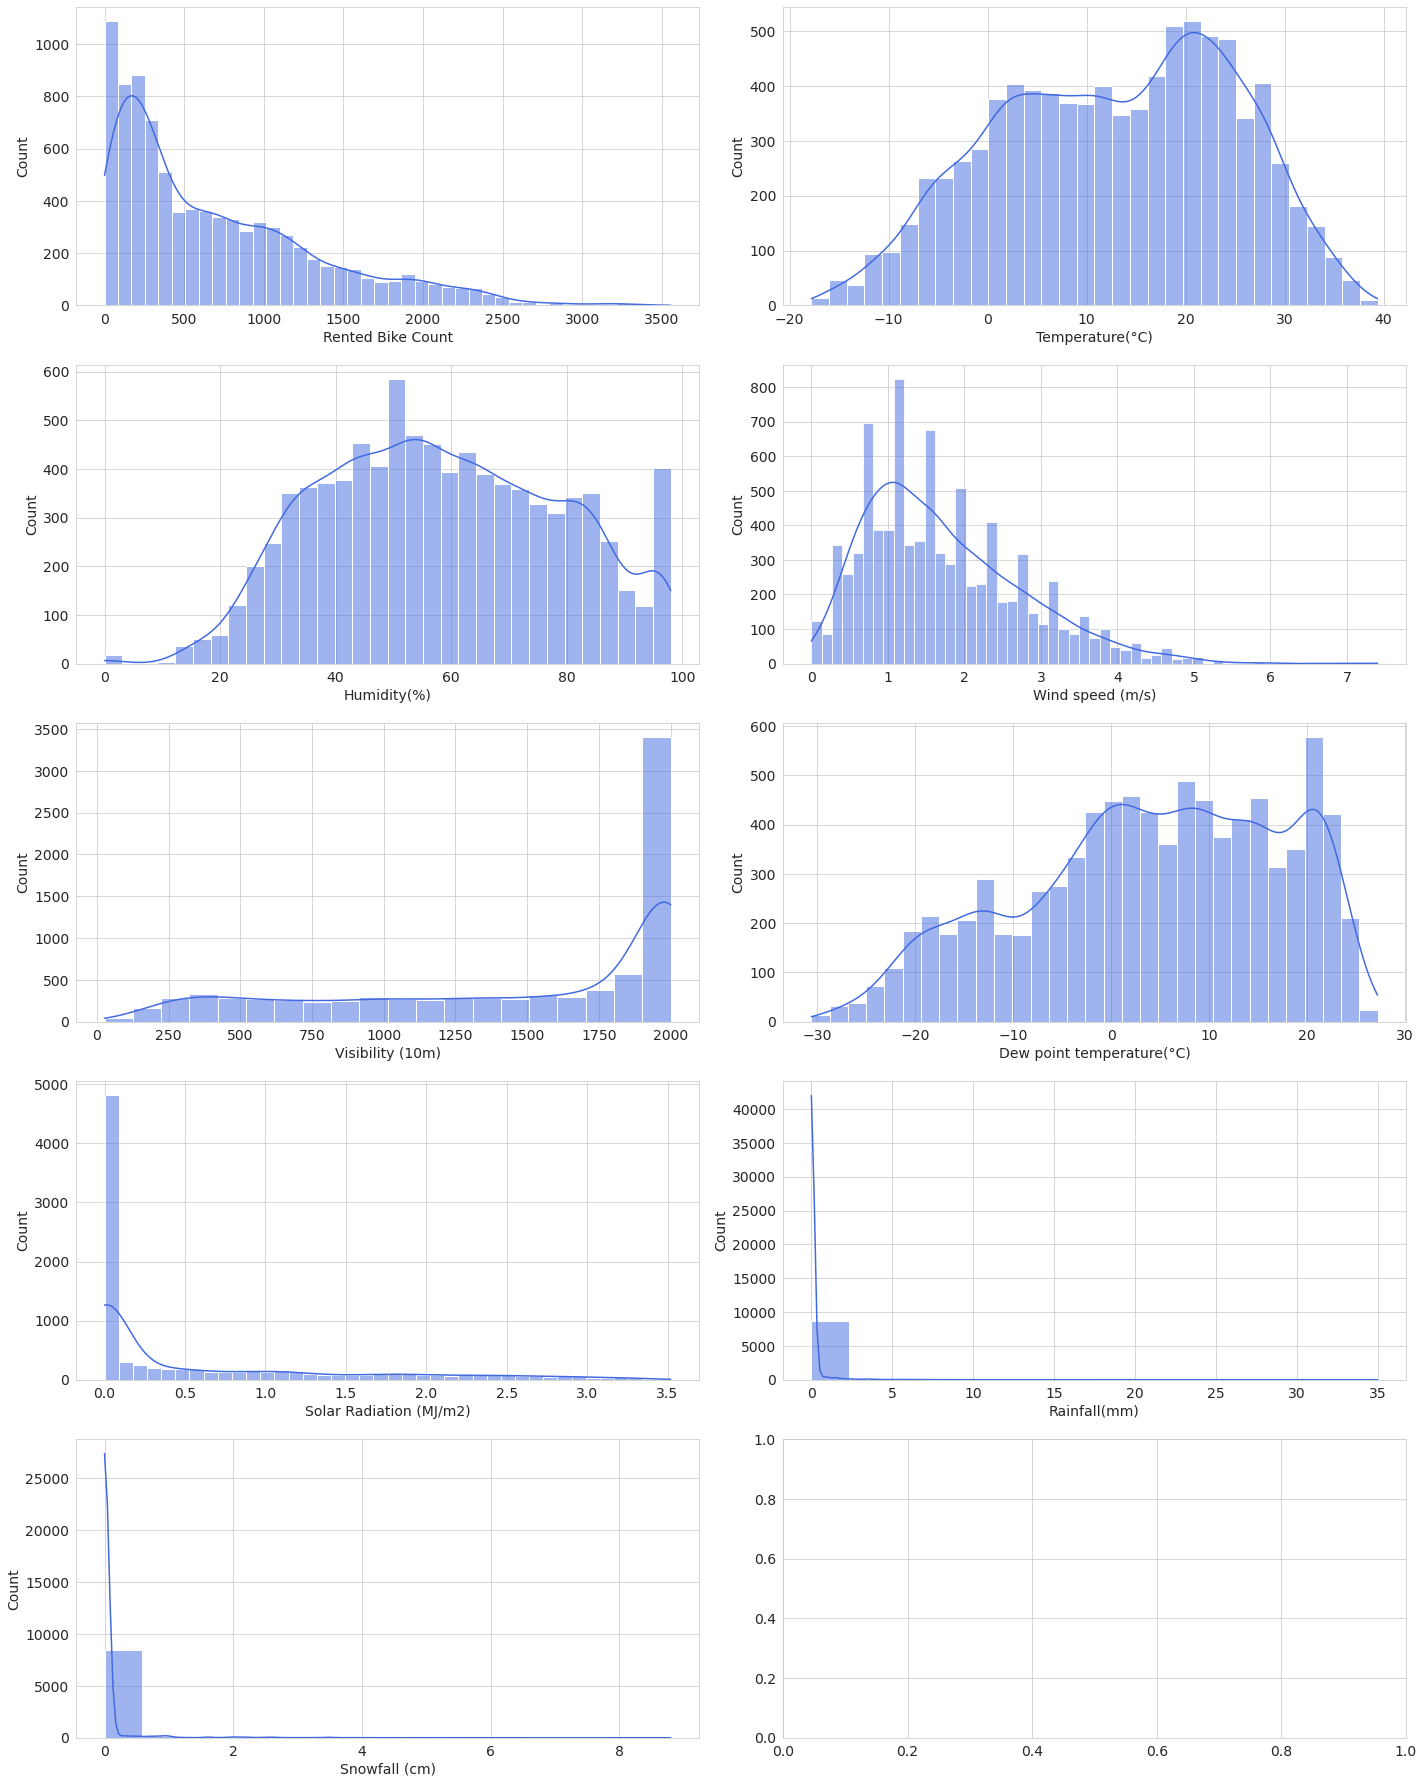

In [108]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(20, 25), nrows= 5, ncols= 2)

# feature that have grater than 32 unique values
features_hist = [col for col in df.columns  if len(df[col].unique()) > 32]

for i, feature in enumerate(features_hist):
  ax = axes[i//2, i % 2]
  sns.histplot(data= df, x = feature, ax = ax, kde= True)

plt.tight_layout();

# Observation 4 : Correlation check


Before doing Correlation check, we need to do one hot encoding for categorical variables.


In [106]:
df_objs = df.select_dtypes(include= 'object')  # data frame with categorical feature

In [107]:
df_nums.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Day', 'Weekday', 'Weekend'],
      dtype='object')

In [97]:
df_objs.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [109]:
# to create dummy variables, drop_firt is for one hot-encoding
df_objs = pd.get_dummies(df_objs, drop_first= True)

# concatinate state , numeric and object (after one-hot encoding)  columns 
df_final = pd.concat([df_nums, df_objs], axis= 1)

In [110]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Year                       8760 non-null   int64  
 11  Month                      8760 non-null   int64  
 12  Day                        8760 non-null   int64  
 13  Weekday                    8760 non-null   int64